In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [9]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance = pd.get_dummies(insurance)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = insurance.drop(['charges'],axis=1)
y = insurance['charges']

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state =42)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_model_1 = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13306.1084 - mae: 13306.1084
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13247.2930 - mae: 13247.2930
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13166.8828 - mae: 13166.8828
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13055.0742 - mae: 13055.0742
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12905.6934 - mae: 12905.6934
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12713.5674 - mae: 12713.5674
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12476.1484 - mae: 12476.1484
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12190.8076 - mae: 12190.8076
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11857.5771 - mae: 11857.5771
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11482.91

In [ ]:
model_1_loss, model_1_mae = insurance_model.evaluate(X_test, y_test)
model_1_loss, model_1_mae

9/9 [==============================] - 0s 2ms/step - loss: 6751.6816 - mae: 6751.6816


(6751.681640625, 6751.681640625)

Text(0.5, 0, 'mae')

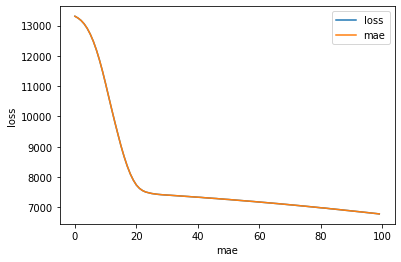

In [ ]:
pd.DataFrame(history_model_1.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
history_model_2 = insurance_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 6774.4302 - mae: 6774.4302
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 6764.1890 - mae: 6764.1890
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 6751.3955 - mae: 6751.3955
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6740.3975 - mae: 6740.3975
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6728.5884 - mae: 6728.5884
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6716.5366 - mae: 6716.5366
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6704.7588 - mae: 6704.7588
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6693.4360 - mae: 6693.4360
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6681.6826 - mae: 6681.6826
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6670.7222 - mae: 6670.7222

In [ ]:
model_2_loss, model_2_mae = insurance_model.evaluate(X_test, y_test)
model_2_loss, model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 5369.2236 - mae: 5369.2236


(5369.2236328125, 5369.2236328125)

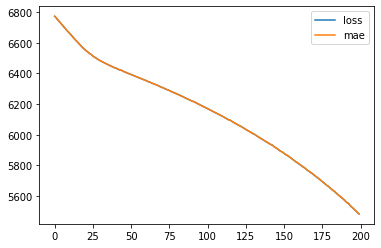

In [ ]:
pd.DataFrame(history_model_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

In [ ]:
history_model_3 = insurance_model_1.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 5ms/step - loss: 13198.9180 - mae: 13198.9180
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 12462.3027 - mae: 12462.3027
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 10410.9590 - mae: 10410.9590
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 7844.8486 - mae: 7844.8486
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 7429.5967 - mae: 7429.5967
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7382.6699 - mae: 7382.6699
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7332.0708 - mae: 7332.0708
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7292.1245 - mae: 7292.1245
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7250.3975 - mae: 7250.3975
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7210.2705 - mae: 721

In [ ]:
model_3_loss, model_3_mae = insurance_model_1.evaluate(X_test, y_test)
model_3_loss, model_3_mae

9/9 [==============================] - 0s 2ms/step - loss: 3157.2625 - mae: 3157.2625


(3157.262451171875, 3157.262451171875)

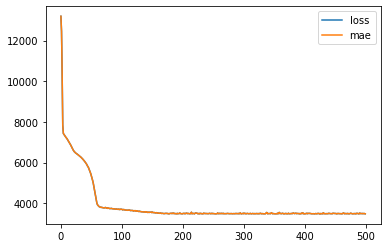

In [ ]:
pd.DataFrame(history_model_3.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

**Preprocessing data - Applying Normalisation**

In [15]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [17]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region'])
)

X = insurance.drop(['charges'], axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [18]:
type(X_train), type(X_train_normal)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)   
]
)

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=5)

insurance_model_3_history = insurance_model_3.fit(X_train_normal, y_train, callbacks=[callback], epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13324.9395 - mae: 13324.9395
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 12977.0029 - mae: 12977.0029
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 10871.4424 - mae: 10871.4424
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 8117.6250 - mae: 8117.6250
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7754.9922 - mae: 7754.9922
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7502.5508 - mae: 7502.5508
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7180.7627 - mae: 7180.7627
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6796.8955 - mae: 6796.8955
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6286.2715 - mae: 6286.2715
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5558.1367 - mae: 555

In [ ]:
insurance_model_3.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 100)               1200      
                                                                 
 dense_99 (Dense)            (None, 100)               10100     
                                                                 
 dense_100 (Dense)           (None, 100)               10100     
                                                                 
 dense_101 (Dense)           (None, 1)                 101       
                                                                 
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

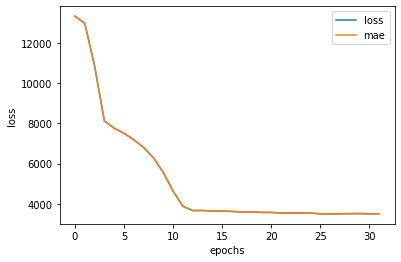

In [ ]:
pd.DataFrame(insurance_model_3_history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)
insurance_model_3_loss, insurance_model_3_mae

9/9 [==============================] - 0s 2ms/step - loss: 3158.5339 - mae: 3158.5339


(3158.533935546875, 3158.533935546875)